
#A3: Unsupervised learning with SOM

Dataset: winequality-red.txt || https://archive.ics.uci.edu/dataset/186/wine+quality



A self-organizing map (SOM) or self-organizing feature map (SOFM) is an unsupervised machine learning technique used to produce a low-dimensional (typically two-dimensional) representation of a higher dimensional data set while preserving the topological structure of the data. For example, a data set with p variables measured in n observations could be represented as clusters of observations with similar values for the variables.

These clusters then could be visualized as a two-dimensional "map" such that observations in proximal clusters have more similar values than observations in distal clusters. This can make high-dimensional data easier to visualize and analyze.

# Install in google colab SOMOCLU

In [1]:
pip install -r /content/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for somoclu: filename=somoclu-1.7.6-cp310-cp310-linux_x86_64.whl size=595674 sha256=58dc072592d3869ffa825a74e5ca3519a8e6e86ec2a065d26c0fc03709110d60
  Stored in directory: /root/.cache/pip/wheels/59/c3/65/d78959b2e432af6e863523efe8d1faa21111c1cc7fd4e04436
Successfully built somoclu


# Import modules


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import somoclu

# load training data

In [3]:

filename = '/content/winequality_red.txt'
df = pd.read_csv(filename, delimiter=',', header=0)

features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
target = ["quality"]

# Separating  features & target

In [4]:


x = df.loc[:, features].values


y = df.loc[:, target].values

print(x)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


# Print planar maps
train Somoclu with default parameter settings

In [5]:
n_rows, n_columns = 200, 200
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
som.train(x)

# Plot the component planes of the trained codebook of the ESOM

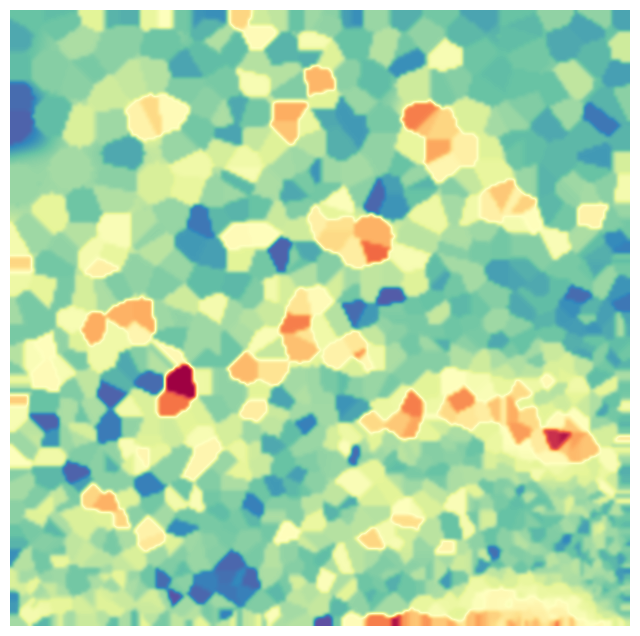

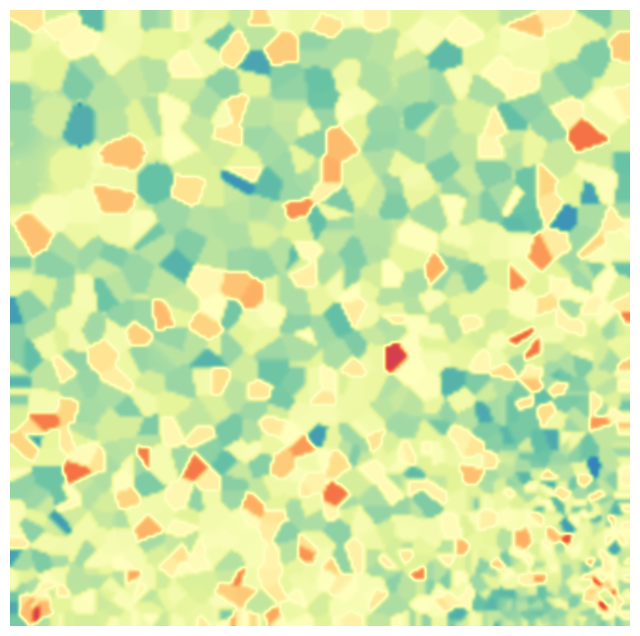

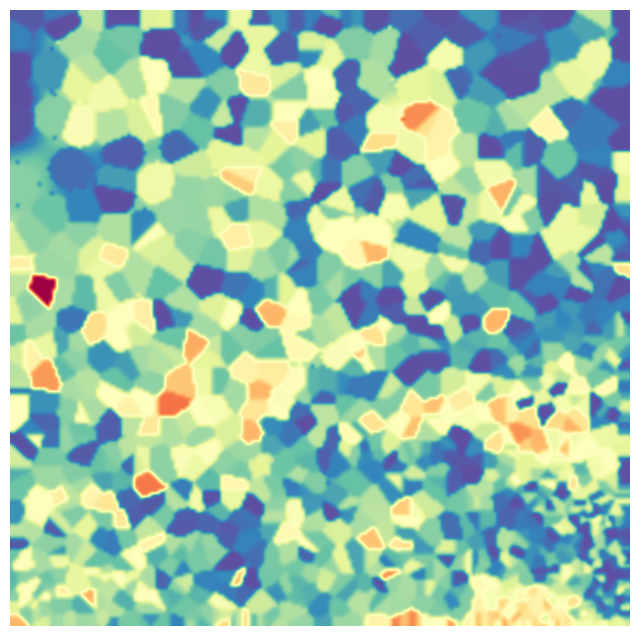

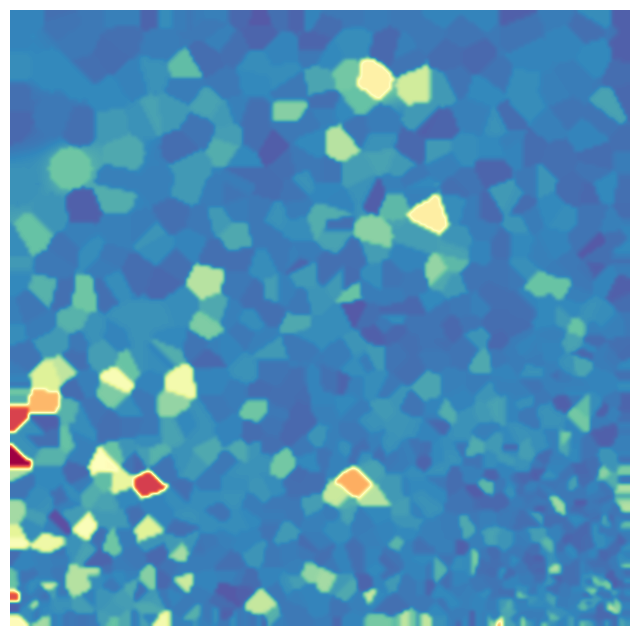

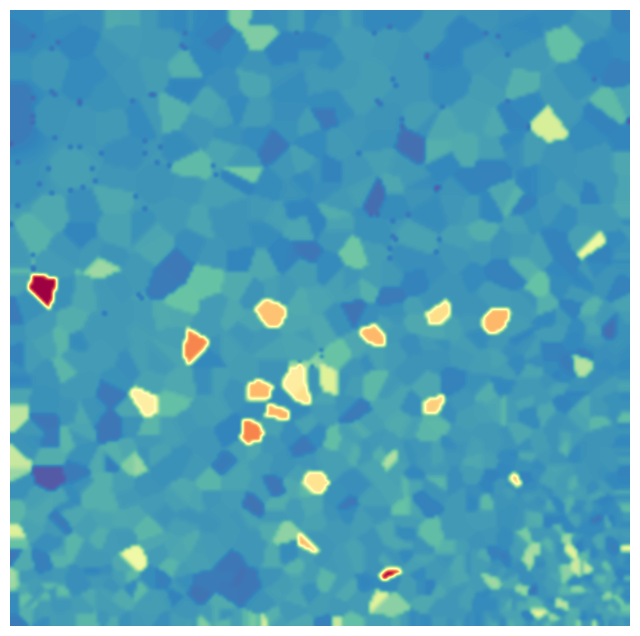

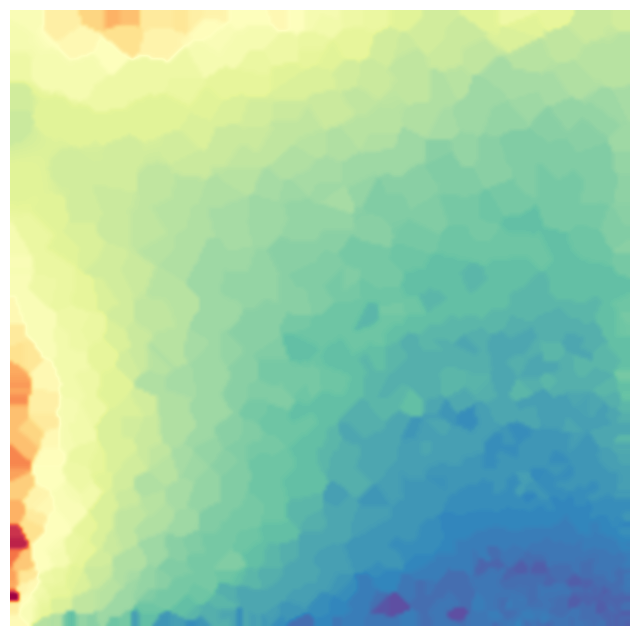

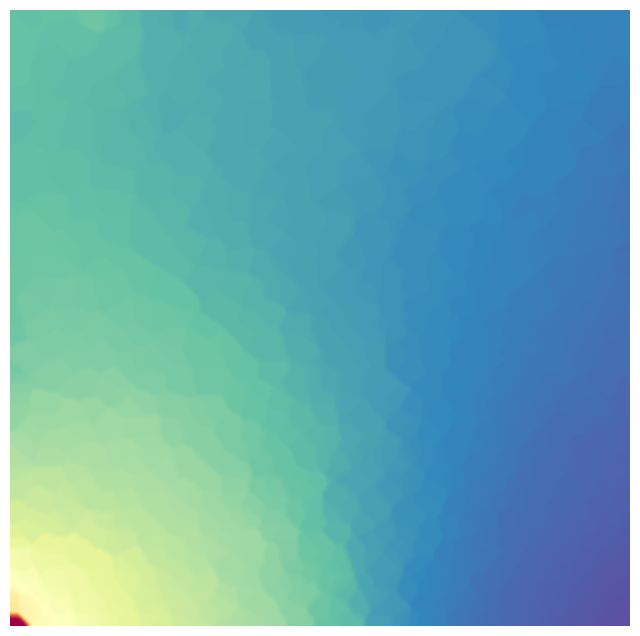

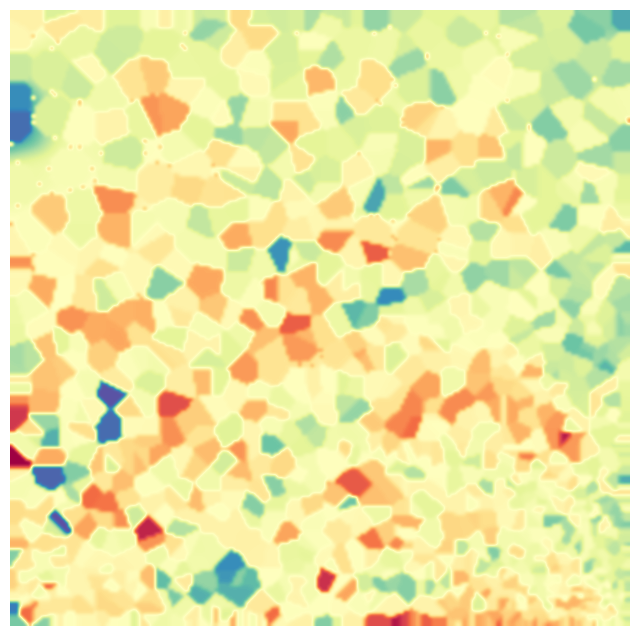

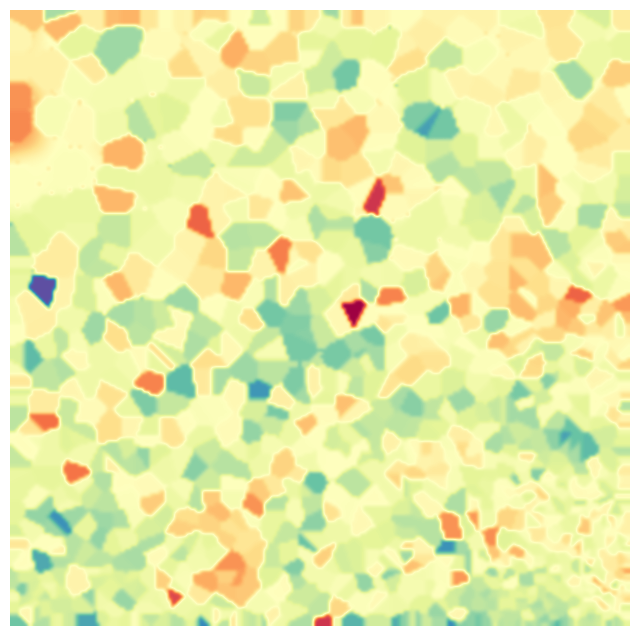

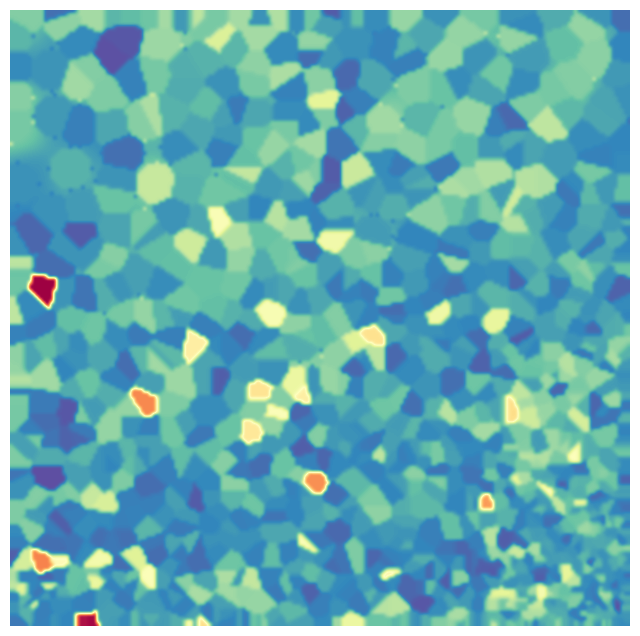

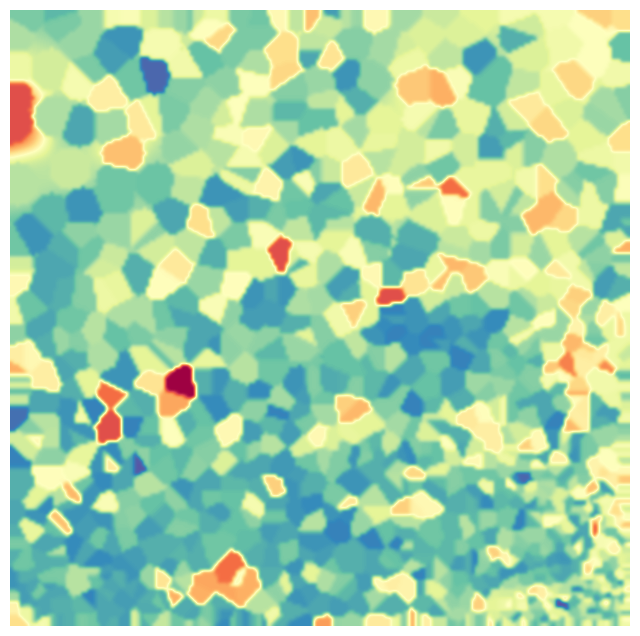

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [6]:
som.view_component_planes()

# Plot the U-Matrix

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

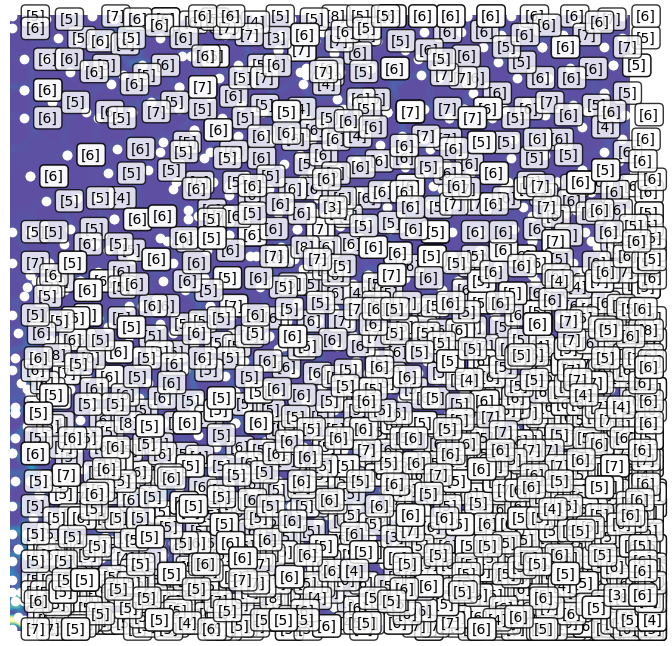

In [7]:
colors = ['red','green','blue','purple','yellow','black','cyan']
som.view_umatrix(bestmatches=True, labels=y, filename='/content/outputdat1')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

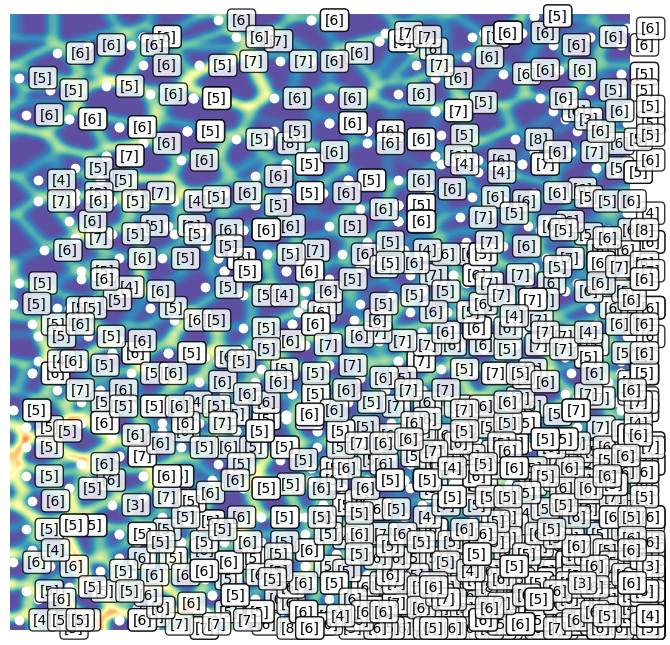

In [8]:
som.view_umatrix(bestmatches=True, filename='/content/outputdat1', labels=y,
                 zoom=((50, n_rows), (100, n_columns)))

# Toroid topology

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

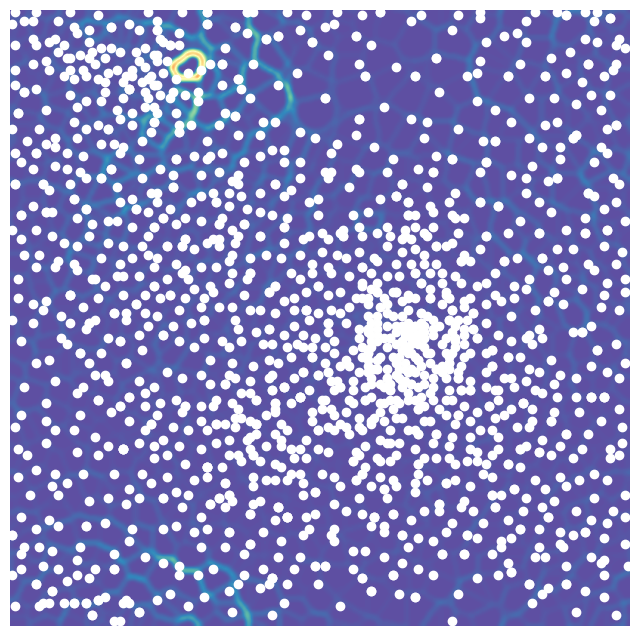

In [9]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False)
som.train(x)
som.view_umatrix(bestmatches=True, filename='/content/outputdat1')

# Initialization with principal component analysis and clustering the results

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

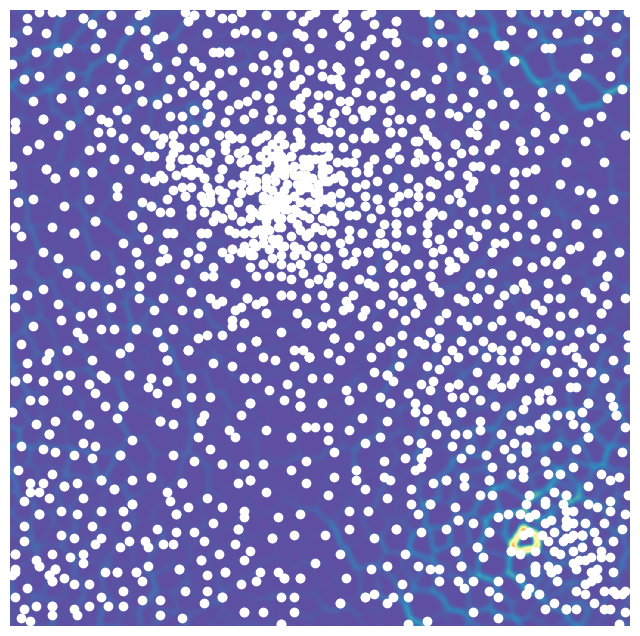

In [10]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False, initialization="pca")
som.train(x)
som.view_umatrix(bestmatches=True, filename='/content/outputdat1')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


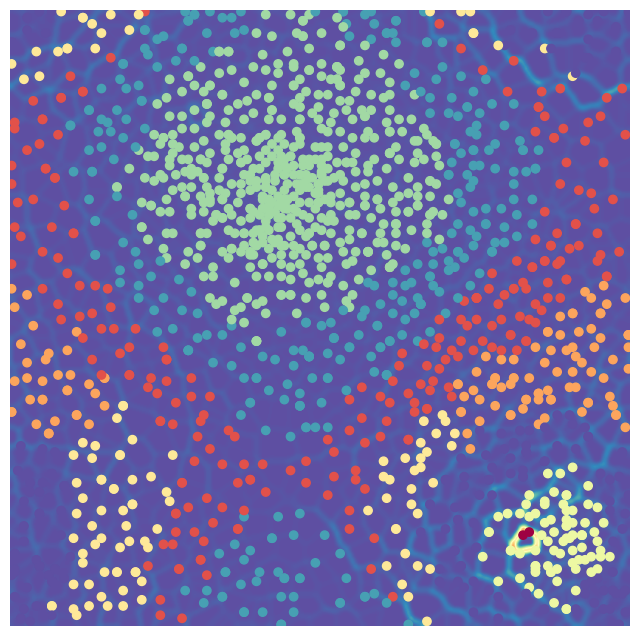

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [11]:
som.cluster()
som.view_umatrix(bestmatches=True)